This python program realizes a simple example of linear regression. The dataset comes from the database of Sweden Automobile
Insurance. The number of insurance and the insured amount have a simple relationship of linear regression.


In [5]:
from csv import reader
import random
import matplotlib.pyplot as plt
from math import sqrt


def load_file(filename):
    dataset = []
    with open(filename) as file:
# with is a syntax to handle exception. Using "with" will help interpreter know it needs to close the file after open.
        reader_line = reader(file)
        #print(list(reader_line)) #if we print here, then reader_line will reach the end
        heading = next(reader_line)

        for line in reader_line:
            #print(line)  # remove '\n'
            data_in_float = [0,0]  #confusing, why initialized inside the loop
            data_in_float[0], data_in_float[1] = float(line[0]), float(line[1])
            dataset.append(data_in_float)
            
    return dataset



def train_test_split(dataset, ratio):
    train_set = []
    test_set = []
    test_set = dataset

    train_set_len = ratio * len(dataset)
# very artful code:
# every time we remove an element from the array. and in the left array, we randomly choose one element and then remove it.
# until reach the target length. finally, we get a array whose elements are not repeatable. 
    while (len(train_set) < train_set_len):
        idx = random.randrange(len(test_set))
        train_set.append(test_set.pop(idx))

    #print(train_set)
    return train_set, test_set

def mean(data):
    data_mean = sum(data) / float(len(data))
    return data_mean

def covariance(x, x_mean, y, y_mean):
    cov = 0.0
    for i in range(len(x)):
        cov += (x[i] - x_mean) * (y[i] - y_mean)

    #print(cov)
    return cov

def variance(x, x_mean):
    var = 0.0

    for i in range(len(x)):
        var += (x[i] - x_mean) * (x[i] - x_mean)

    #print(var)
    return var


def calculate_coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    #print(dataset)
    #print(y)
    x_mean, y_mean = mean(x), mean(y)
    print('x_mean: %5f y_mean: %5f ' % (x_mean, y_mean))

    cov = covariance(x, x_mean, y, y_mean)
    var = variance(x, x_mean)

    w1 = cov / var;
    w0 = y_mean - w1 * x_mean
    return w0, w1

def calculate_rmse(act_y, pre_y):
    rmse = 0.0
    sum_error = 0.0
    
    for i in range(len(act_y)):
        sum_error += (pre_y[i] - act_y[i]) ** 2

    rmse = sqrt(sum_error / float(len(act_y)))
    
    return rmse


def evaluate_linear_regression_algorithm(dataset, ratio):
    train_set, test_set = train_test_split(dataset, ratio)
    w0, w1 = calculate_coefficients(train_set)
    rmse = 1
    print("w0: %5f,w1: %5f" % (w0, w1))

    predict_y_value = []
    for row in test_set:
        y_predict = row[0] * w1 + w0
        predict_y_value.append(y_predict)

    actual_y_value = [row[-1] for row in test_set]
    x = [row[0] for row in test_set]
    #y = [row[1] for row in dataset]
    plt.plot(x,predict_y_value)
    plt.show()

    rmse = calculate_rmse(actual_y_value, predict_y_value)

    
    return rmse


In [ ]:
Main program. First load the dataset, and transfer them to regression algorithm for training.

x_mean: 23.710526 y_mean: 103.105263 
w0: 22.849067,w1: 3.384834


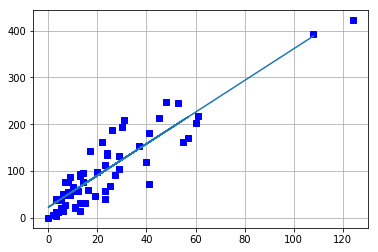

rmse = 33.710791


In [6]:
dataset = load_file('dataset.csv')

x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
plt.plot(x,y, 'bs')
plt.grid()

ratio_train_test = 0.6 # train set to test set ratio
rmse = evaluate_linear_regression_algorithm(dataset, ratio_train_test)
print('rmse = %5f' % rmse)